In [1]:
# Import numerical and plotting libraries
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
# Only show 3 decimals when printing
np.set_printoptions(precision=3)

In [2]:
%matplotlib inline

In [3]:
student_means = [9.2, 8.9, 9.0, 9.25]
sd = 0.05
n_per_student = 40

In [4]:
np.random.seed(42)

In [5]:
from textwrap import TextWrapper

def show_distributions(ds):
    names = ['brum_0', 'brum_1', 'cam_0', 'cam_1']
    for d, name in zip(ds, names):
        rep = repr_distribution(d)
        prefix = name + ' = '
        wrapper = TextWrapper(initial_indent=prefix,
                              subsequent_indent=' ' * (len(prefix) + 1),
                              width = 78)
        print(wrapper.fill(rep))
    
def repr_distribution(d):
    rep = (repr(d).replace('. ', '.0')
           .replace('\n', ' ')
           .replace(' ', '')
           .replace(',', ', ')
           .replace(r'array([', '[')
           .replace(r'])', ']'))
    return(rep)

In [6]:
student_distributions = []
for st_mean in student_means:
    distribution = np.random.normal(st_mean, sd, size=n_per_student)
    distribution = np.round(distribution, 2)
    student_distributions.append(distribution)

In [7]:
show_distributions(student_distributions)

brum_0 = [9.22, 9.19, 9.23, 9.28, 9.19, 9.19, 9.28, 9.24, 9.18, 9.23, 9.18,
          9.18, 9.21, 9.1, 9.11, 9.17, 9.15, 9.22, 9.15, 9.13, 9.27, 9.19,
          9.2, 9.13, 9.17, 9.21, 9.14, 9.22, 9.17, 9.19, 9.17, 9.29, 9.2,
          9.15, 9.24, 9.14, 9.21, 9.1, 9.13, 9.21]
brum_1 = [8.94, 8.91, 8.89, 8.88, 8.83, 8.86, 8.88, 8.95, 8.92, 8.81, 8.92,
          8.88, 8.87, 8.93, 8.95, 8.95, 8.86, 8.88, 8.92, 8.95, 8.88, 8.89,
          8.84, 8.84, 8.94, 8.97, 8.9, 8.95, 8.92, 8.87, 8.92, 8.98, 8.9,
          8.98, 8.77, 8.94, 8.9, 8.89, 8.9, 8.8]
cam_0 = [8.99, 9.02, 9.07, 8.97, 8.96, 8.97, 9.05, 9.02, 8.97, 9.03, 9.0,
         9.05, 8.96, 8.98, 8.98, 8.93, 9.01, 9.01, 9.0, 8.99, 8.93, 8.98,
         8.98, 8.96, 8.99, 9.02, 9.09, 9.01, 9.01, 9.0, 8.9, 9.0, 9.0, 9.12,
         8.99, 9.02, 9.0, 8.94, 9.06, 9.04]
cam_1 = [9.29, 9.2, 9.32, 9.18, 9.28, 9.36, 9.2, 9.22, 9.25, 9.22, 9.17, 9.25,
         9.2, 9.27, 9.2, 9.33, 9.21, 9.23, 9.29, 9.19, 9.26, 9.32, 9.17, 9.26,
         9.26, 9.29, 9

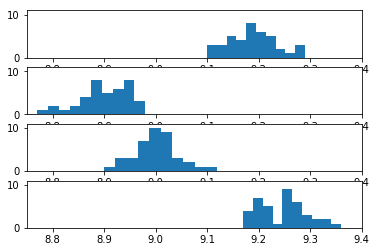

In [8]:
fig, axes = plt.subplots(4, 1)
for i, ax in enumerate(axes.flat):
    ax.hist(student_distributions[i])
    ax.axis([8.75, 9.4, 0, 11])

In [9]:
psycho_repeats = np.concatenate(student_distributions)
psycho_repeats.shape

(160,)

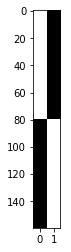

In [10]:
N = len(psycho_repeats)
X = np.zeros((N, 2))
X[:n_per_student * 2, 0] = 1
X[n_per_student * 2:, 1] = 1
plt.imshow(X, cmap='gray', aspect=0.1)

In [11]:
# Get t distribution code from scipy library
from scipy.stats import t as t_dist

In [12]:
def t_stat(y, X, c):
    """ betas, t statistic and significance test given data, design matrix, contrast

    This is OLS estimation; we assume the errors to have independent
    and identical normal distributions around zero for each $i$ in
    $\e_i$ (i.i.d).
    """
    # Make sure y, X, c are all arrays
    y = np.asarray(y)
    X = np.asarray(X)
    c = np.atleast_2d(c).T  # As column vector
    # Calculate the parameters - b hat
    beta = npl.pinv(X).dot(y)
    # The fitted values - y hat
    fitted = X.dot(beta)
    # Residual error
    errors = y - fitted
    # Residual sum of squares
    RSS = (errors**2).sum(axis=0)
    # Degrees of freedom is the number of observations n minus the number
    # of independent regressors we have used.  If all the regressor
    # columns in X are independent then the (matrix rank of X) == p
    # (where p the number of columns in X). If there is one column that
    # can be expressed as a linear sum of the other columns then
    # (matrix rank of X) will be p - 1 - and so on.
    df = X.shape[0] - npl.matrix_rank(X)
    # Mean residual sum of squares
    MRSS = RSS / df
    # calculate bottom half of t statistic
    SE = np.sqrt(MRSS * c.T.dot(npl.pinv(X.T.dot(X)).dot(c)))
    t = c.T.dot(beta) / SE
    # Get p value for t value using cumulative density dunction
    # (CDF) of t distribution
    ltp = t_dist.cdf(t, df) # lower tail p
    p = 1 - ltp # upper tail p
    return beta, t, df, p

In [13]:
t_stat(psycho_repeats, X, [-1, 1])

(array([ 9.044,  9.124]), array([[ 3.508]]), 158, array([[ 0.]]))